<a href="https://colab.research.google.com/github/Louismada29/Credits_Default/blob/main/Credit(Loans)_Default_ClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prologue**

Saat ini saya akan mencoba untuk menganalisa dan membuat model prediksi klasifikasi Credit Risk Scoring. Saya akan mencoba memprediksi menggunakan features yang ada. Model Klasifikasi yang digunakan adalah: 



1.   K-Nearest Neighbors (KNN)
2.   Decision Tree
3.   Random Forest



## **Description**
Institusi-institusi finansial seperti perbankan mengalami kerugian akibat gagal bayar para kreditornya. Hal ini mengharuskan adanya proses yang lebih ketat terhadap approval pengajuan kredit oleh nasabah. Proses assessment yang lebih baik menjadi suatu kebutuhan bagi institusi-institusi tersebut.

Kali ini, kalian diminta untuk membuat sebuah model yang dapat memprediksi kemungkinan nasabah gagal bayar dengan akurat.
Dataset yang kami gunakan adalah dummy dan hanya untuk kebutuhan edukasi. Dataset yang ada mencakup informasi gagal bayar dan profil nasabahnya.

## **Methodology Description**

Model akan diukur menggunakan Accuracy, Precision, Recall, F1_Score antara hasil prediksi dan label/kelas aslinya.

True Positive (TP) = your prediction is 1, and the ground truth is also 1

False Positive (FP) = your prediction is 1, and the ground truth is 0

False Negative (FN) = your prediction is 0, and the ground truth is 1

# Import Library

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

## Read Data

In [375]:
data_train = pd.read_csv('https://raw.githubusercontent.com/Louismada29/Credits_Default/main/credit_default_dataset.csv')
data_train.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0


In [376]:
# melihat informasi dalam data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   3693 non-null   int64  
 1   customer_bod  3693 non-null   object 
 2   gender        3385 non-null   object 
 3   phone_flag    3693 non-null   float64
 4   student       3693 non-null   object 
 5   employment    2701 non-null   object 
 6   credit_card   3682 non-null   float64
 7   balance       3693 non-null   float64
 8   income        3693 non-null   float64
 9   tenure        3693 non-null   object 
 10  default       3693 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 317.5+ KB


In [377]:
# data shape
data_train.shape

(3693, 11)

In [378]:
data_test = pd.read_csv('https://raw.githubusercontent.com/Louismada29/Credits_Default/main/test.csv')
data_test.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,1999-10-22,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0yrs 0mon
1,999,1987-05-03,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0yrs 7mon
2,2835,2000-10-20,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon
3,5821,1994-07-13,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon
4,2330,1996-10-03,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1yrs 3mon


In [379]:
# melihat informasi dalam data
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   307 non-null    int64  
 1   customer_bod  307 non-null    object 
 2   gender        293 non-null    object 
 3   phone_flag    307 non-null    float64
 4   student       307 non-null    object 
 5   employment    222 non-null    object 
 6   credit_card   305 non-null    float64
 7   balance       307 non-null    float64
 8   income        307 non-null    float64
 9   tenure        307 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 24.1+ KB


In [380]:
# data shape
data_test.shape

(307, 10)

# Exploratory Data Analysis

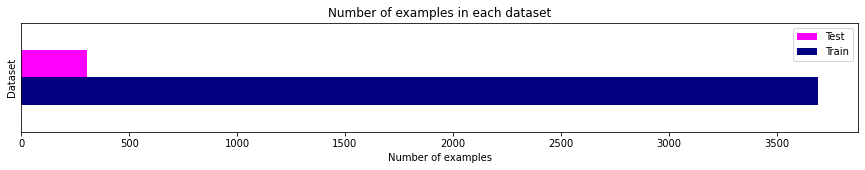

In [381]:
pd.DataFrame({'Train': [data_train.shape[0]], 'Test': [data_test.shape[0]]}).plot.barh(
figsize = (15,2), legend= 'reverse', color=['navy','magenta'])
plt.title('Number of examples in each dataset')
plt.ylabel('Dataset')
plt.yticks([])
plt.xlabel('Number of examples')
plt.show()

In [382]:
print("Training headcount is %i." % data_train.shape[0])
print("Testing headcount is %i." % data_test.shape[0])

Training headcount is 3693.
Testing headcount is 307.


Text(0.5, 0, 'Number of columns')

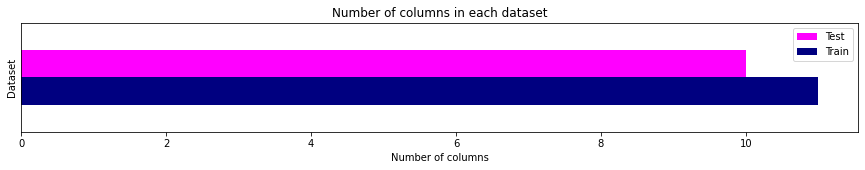

In [383]:
pd.DataFrame({'Train': [data_train.shape[1]],'Test': [data_test.shape[1]]}).plot.barh(
figsize=(15,2), legend='reverse', color=['navy','magenta'])
plt.title('Number of columns in each dataset')
plt.ylabel('Dataset')
plt.yticks([])
plt.xlabel('Number of columns')

Data Terbagi menjadi 2 bagian yaitu:


1.   Data Train
2.   Data Test



**Objective:** Terdapat 11 kolom dalam data train dan 10 kolom dalam data test

## Dependent Variable

In [384]:
# Dependent Variable
y = data_train['default']
y_no = y[y=='0']
y_yes = y[y=='1']

# Independent Variable
X = data_train.drop('default', axis = 1)
x_no = data_train[data_train['default']=='No'].drop(['customer_id', 'default'], axis = 1)
x_yes = data_train[data_train['default']=='Yes'].drop(['customer_id', 'default'], axis = 1)

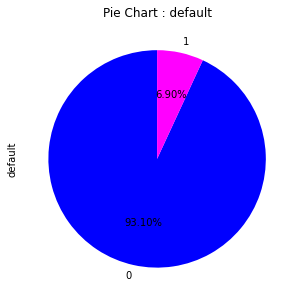

In [385]:
default = y.value_counts()
default.plot.pie(figsize=(5,5), autopct='%1.2F%%', colors=['blue','magenta'], startangle=90)

plt.title('Pie Chart : default')
plt.show() 

''' Terlihat data yang tidak seimbang antara kategori 1 dengan kategori 0'''
print()

**Objective:** Berdasarkan distribusi data pada Dependent variable dalam hal ini adalah kolom 'default' terlihat bahwa terdapat ketidakseimbangan distribusi data sehingga di langkah berikutnya memerlukan metode Imbalanced

## Independent Variables

### Distribution of Gender

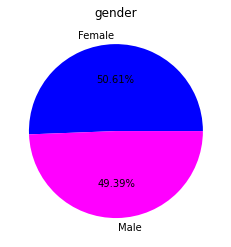

Female    1713
Male      1672
Name: gender, dtype: int64


In [386]:
gender = data_train['gender'].value_counts()
label = gender.index

plt.pie(gender, labels=label, autopct='%.2f%%', colors=['blue','magenta'])
#plt.legend(loc='upper left')
plt.title('gender')
plt.show()
print(gender)

### Distribution of student

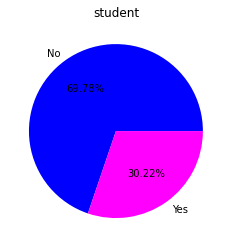

No     2577
Yes    1116
Name: student, dtype: int64


In [387]:
student = data_train['student'].value_counts()
label = student.index

plt.pie(student, labels=label, autopct='%.2f%%', colors=['blue','magenta'])
#plt.legend(loc='upper left')
plt.title('student')
plt.show()
print(student)

### Distribution of employment

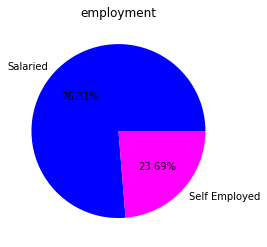

No     2577
Yes    1116
Name: student, dtype: int64


In [388]:
employment = data_train['employment'].value_counts()
label = employment.index

plt.pie(employment, labels=label, autopct='%.2f%%', colors=['blue','magenta'])
#plt.legend(loc='upper left')
plt.title('employment')
plt.show()
print(student)

### Heatmap

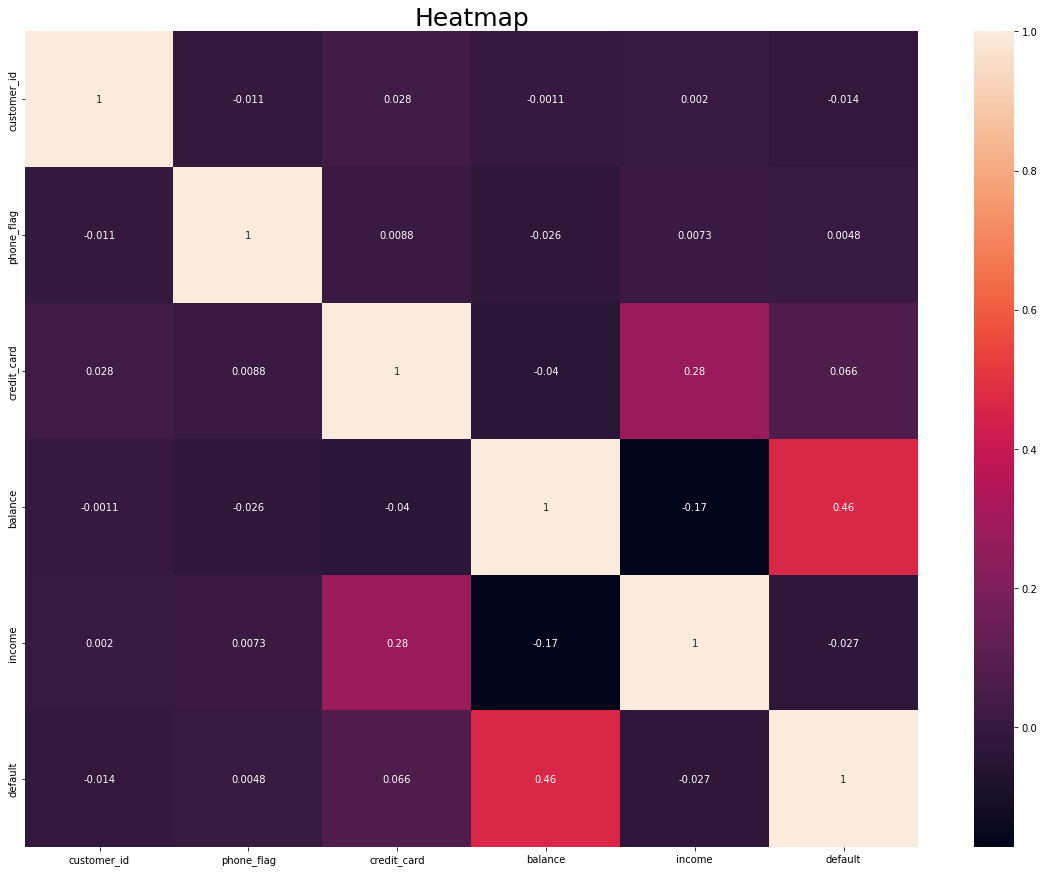

In [389]:
plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr(), annot=True, )
plt.title("Heatmap", fontsize = 25);
plt.show()

# Data Preprocesing

## Feature Engineering

### Change DOB to Age by Days

In [390]:
from datetime import datetime, date

for data in (data_train, data_test):

  data['customer_bod'] = pd.to_datetime(data['customer_bod'])
  data['age'] = data['customer_bod'].apply(lambda x: 2021-x.year)
  data.drop('customer_bod', axis = 1, inplace= True)

In [391]:
data_train.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default,age
0,8300,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0,28
1,672,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0,14
2,5670,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0,21
3,2975,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0,22
4,3883,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0,44


In [392]:
data_test.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,tenure,age
0,9365,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0yrs 0mon,22
1,999,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0yrs 7mon,34
2,2835,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon,21
3,5821,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon,27
4,2330,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1yrs 3mon,25


### Change Tenure to Numerical Value

In [393]:
def extract_month(given_tenure):
  """
  input : get each tenure from series
  output : monthly value
  example :
    - input : 4yrs 4 mon
    - output : 4(12) + 4 = 52
  """
  year, month = 12, 0
  year += int(given_tenure.split()[0].replace('yrs', ''))
  month += int(given_tenure.split()[1].replace('mon', ''))
  # result
  return year+month

In [394]:
for data in (data_train, data_test):
  # create monthly from tenure feature
  data['monthly tenure'] = data['tenure'].apply(lambda x: extract_month(x))
  # remove tenure feature
  data = data.drop('tenure', axis = 1, inplace = True)

In [395]:
data_train.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,default,age,monthly tenure
0,8300,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,0,28,20
1,672,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,0,14,17
2,5670,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0,21,21
3,2975,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,0,22,21
4,3883,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0,44,22


In [396]:
data_test.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,age,monthly tenure
0,9365,Male,0.0,No,Salaried,1.0,0.00,4430744.15,22,12
1,999,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,34,19
2,2835,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,21,24
3,5821,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,27,22
4,2330,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,25,16


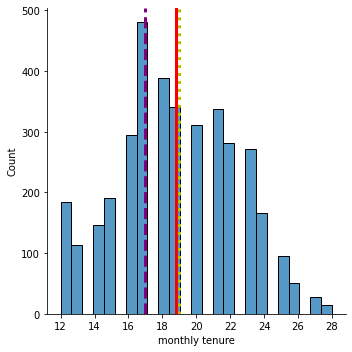

Average :  18.821554291903603
Standard deviation :  3.536966379491657
Median :  19.0
Mode :  17


In [397]:
# distribution of target variable 'monthly tenure'
sns.displot(data=data_train, x='monthly tenure')

average = data_train['monthly tenure'].mean()
median = data_train['monthly tenure'].median()
mode = data_train['monthly tenure'].mode()
std = data_train['monthly tenure'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

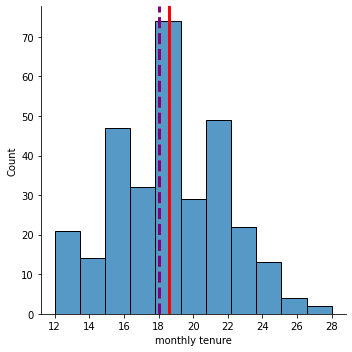

Average :  18.615635179153095
Standard deviation :  3.3424605194358183
Median :  18.0
Mode :  18


In [398]:
# distribution of target variable 'monthly tenure'
sns.displot(data=data_test, x='monthly tenure')

average = data_test['monthly tenure'].mean()
median = data_test['monthly tenure'].median()
mode = data_test['monthly tenure'].mode()
std = data_test['monthly tenure'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

## Drop Duplicates

In [399]:
data_train.drop_duplicates() # Tidak ada data duplicate

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,default,age,monthly tenure
0,8300,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,0,28,20
1,672,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,0,14,17
2,5670,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0,21,21
3,2975,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,0,22,21
4,3883,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0,44,22
...,...,...,...,...,...,...,...,...,...,...,...
3688,5661,NaN,0.0,No,Salaried,0.0,144844.88,5060638.68,0,20,21
3689,219,Female,1.0,Yes,Self Employed,0.0,192978.31,2682965.60,0,17,19
3690,7289,Male,1.0,Yes,NaN,0.0,141840.01,2172340.05,0,19,13
3691,698,Male,1.0,No,Salaried,0.0,69477.43,5556566.10,0,43,25


In [400]:
data_test.drop_duplicates() # Tidak ada data duplicate

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,age,monthly tenure
0,9365,Male,0.0,No,Salaried,1.0,0.00,4430744.15,22,12
1,999,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,34,19
2,2835,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,21,24
3,5821,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,27,22
4,2330,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,25,16
...,...,...,...,...,...,...,...,...,...,...
302,7494,Female,1.0,Yes,Self Employed,0.0,163303.88,2677311.54,18,20
303,630,Male,1.0,Yes,NaN,0.0,118865.19,1487818.87,19,22
304,1978,Female,1.0,Yes,NaN,0.0,165272.36,2049269.05,11,17
305,582,Female,0.0,Yes,NaN,0.0,212516.33,1917064.46,19,19


## Finding Missing Value

In [401]:
# Number of cases with NaN
data_train.isnull().sum()

customer_id         0
gender            308
phone_flag          0
student             0
employment        992
credit_card        11
balance             0
income              0
default             0
age                 0
monthly tenure      0
dtype: int64

In [402]:
# Number of cases with NaN
data_test.isnull().sum()

customer_id        0
gender            14
phone_flag         0
student            0
employment        85
credit_card        2
balance            0
income             0
age                0
monthly tenure     0
dtype: int64

### Data Imputation

In [403]:
for data in (data_train, data_test):
  # Data Imputation for Gender
  data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
  data['gender'] = data['gender'].values

  # Data imputation for Employement
  data['employment'] = data['employment'].fillna(data['employment'].mode()[0])
  data['employment'] = data['employment'].values

  # Missing Values (credit_card)
  data.loc[data['credit_card'].isnull(), 'credit_card'] = data['credit_card'].median()

## Label Encoder

In [404]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for data in (data_train, data_test):
  data['gender'] = label.fit_transform(data['gender'])
  data['student'] = label.fit_transform(data['student'])
  data['employment'] = label.fit_transform(data['employment'])

In [405]:
data_train.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,default,age,monthly tenure
0,8300,0,1.0,0,1,1.0,87104.12,5015120.75,0,28,20
1,672,0,1.0,1,0,0.0,89236.34,2266076.58,0,14,17
2,5670,0,1.0,1,0,0.0,171553.12,1779347.34,0,21,21
3,2975,0,1.0,1,0,0.0,85979.04,2014246.24,0,22,21
4,3883,1,1.0,0,0,0.0,48874.77,5445148.31,0,44,22


In [406]:
data_test.head()

,customer_id,gender,phone_flag,student,employment,credit_card,balance,income,age,monthly tenure
0,9365,1,0.0,0,0,1.0,0.00,4430744.15,22,12
1,999,0,0.0,0,0,0.0,67431.40,3743149.53,34,19
2,2835,1,1.0,0,0,1.0,69128.28,4821579.61,21,24
3,5821,1,1.0,0,0,0.0,151051.78,3159764.69,27,22
4,2330,1,0.0,0,1,0.0,92727.85,5659353.20,25,16


## Feature Selection

### Numerical Feature

#### Using Anova Testing

In [407]:
X_num = data_train[['balance', 'income', 'age', 'monthly tenure']]

In [408]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

In [409]:
MIC_anova = SelectKBest(score_func=f_classif, k='all')

In [410]:
MIC_anova.fit(X_num, y)

SelectKBest(k='all')

In [411]:
feature_MI_pvalue = pd.Series(MIC_anova.pvalues_, index = X_num.columns)
feature_MI_pvalue.round(4).sort_values(ascending = False)

income            0.0995
monthly tenure    0.0234
balance           0.0000
age               0.0000
dtype: float64

Berdasarkan **P-value** yang diperoleh dari pengujian ANOVA di atas, maka dapat disimpulkan bahwa semua variabel numerik yang akan digunakan ternyata mempunyai pengaruh yang signifikan terhadap default atau tidaknta credit tersebut.

### Categorical Feature

In [412]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [413]:
# data Kategorik
X_cat = data_train[['gender', 'phone_flag', 'student','employment','credit_card']].astype("category")

In [414]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gender       3693 non-null   category
 1   phone_flag   3693 non-null   category
 2   student      3693 non-null   category
 3   employment   3693 non-null   category
 4   credit_card  3693 non-null   category
dtypes: category(5)
memory usage: 18.8 KB


#### Using Chi-Squred Test

In [415]:
chi_scores = chi2(X_cat, y)
chi_scores

(array([6.04597103e-02, 2.89090033e-02, 7.33603926e+00, 1.43399863e+02,
        1.19378964e+01]),
 array([8.05770819e-01, 8.64989313e-01, 6.75855926e-03, 4.80622021e-33,
        5.50035483e-04]))

In [416]:
nilai_chi = pd.Series(chi_scores[0], index = X_cat.columns)
nilai_chi

gender           0.060460
phone_flag       0.028909
student          7.336039
employment     143.399863
credit_card     11.937896
dtype: float64

In [417]:
p_value = pd.Series(chi_scores[1], index = X_cat.columns)
p_value.round(4)

gender         0.8058
phone_flag     0.8650
student        0.0068
employment     0.0000
credit_card    0.0006
dtype: float64

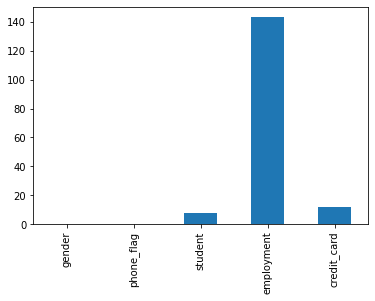

In [418]:
nilai_chi.plot.bar()

Berdasarkan nilai chi-squared serta p-value yang dihasilkan, dapat diambil kesimpulan bahwa dari 7 variabel kategori yang diuji signifikansi terhadap variabel target, diperoleh ternyata berdasarkan uji chi-squared hanya ada 4 variabel yang signifikan berpengaruh terhadap default atau tidaknya credit tersebut.

variabel tersebut di antaranya **student, employement, credit_card**

## Train Test Split

In [419]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['default', 'customer_id','gender','phone_flag' ], axis=1)
y = data_train['default']

### Imbalaced

In [420]:
# Handling imbalance df
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

In [421]:
# Fit the over sampling
X, y = oversampling.fit_resample(X, y)

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

## Scaling

In [423]:
# scaling
from sklearn.preprocessing import StandardScaler

In [424]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [425]:
X_train.head()

,student,employment,credit_card,balance,income,age,monthly tenure
6278,0,1,0.047671,247493.285512,6.114989e+06,20,21
5081,0,0,0.482535,159525.261651,4.269392e+06,31,18
6677,0,0,1.000000,171180.721710,5.702354e+06,35,22
5482,0,0,0.323893,166422.747180,5.217793e+06,25,20
4456,1,0,0.000000,260265.310855,2.646271e+06,10,23


In [426]:
X_train_scaled.head()

,student,employment,credit_card,balance,income,age,monthly tenure
0,-0.678840,2.067184,-0.636772,1.292292,1.354589,-0.503964,0.673203
1,-0.678840,-0.483750,0.350898,0.083981,0.210303,0.663066,-0.262904
2,-0.678840,-0.483750,1.526175,0.244078,1.098752,1.087440,0.985239
3,-0.678840,-0.483750,-0.009412,0.178724,0.798319,0.026504,0.361167
4,1.473102,-0.483750,-0.745044,1.467726,-0.796048,-1.564900,1.297275


# Classification Model

## Import Library

In [427]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [428]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    f1_score = round((2* (precision * recall)/(precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

## KNN

In [429]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [430]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [431]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[2536  224]
 [  54 2686]]
Accuracy   : 94.95 %
Precision  : 92.3 %
Recall     : 98.03 %
F1_Score   : 95 %


In [432]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[609  69]
 [ 21 677]]
Accuracy   : 93.46 %
Precision  : 90.75 %
Recall     : 96.99 %
F1_Score   : 94 %


## Decision Tree

In [433]:
dectree = DecisionTreeClassifier(max_depth=7) # bisa cek pake gini atau pake entropy
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [434]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [435]:
pd.DataFrame(y_test_pred, columns=['default'])

,default
0,1
1,1
2,0
3,0
4,1
...,...
1371,1
1372,1
1373,1
1374,0


In [436]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[2575  185]
 [ 103 2637]]
Accuracy   : 94.76 %
Precision  : 93.44 %
Recall     : 96.24 %
F1_Score   : 95 %


In [437]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[620  58]
 [ 38 660]]
Accuracy   : 93.02 %
Precision  : 91.92 %
Recall     : 94.56 %
F1_Score   : 93 %


## Random Forest

In [438]:
ranfor = RandomForestClassifier(max_depth=7)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [439]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [440]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[2571  189]
 [ 100 2640]]
Accuracy   : 94.75 %
Precision  : 93.32 %
Recall     : 96.35 %
F1_Score   : 95 %


In [441]:
classification_eval(y_test, y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[629  49]
 [ 24 674]]
Accuracy   : 94.69 %
Precision  : 93.22 %
Recall     : 96.56 %
F1_Score   : 95 %


# **Kesimpulan**

Berdasarkan ketiga model diatas, maka dapat disimpulkan bahwa model Random Forest memiliki Metriks Evaluasi yang paling tepat untuk diaplikasikan pada Credit Risk Scoring dataset

# Submission

In [445]:
data_test['default'] = ranfor.predict(data_test[['student','employment','credit_card','balance','income','age','monthly tenure']])

data_test[['customer_id', 'default']].to_csv('credit_default.csv', index = False)
data_test[['customer_id', 'default']].head(20)

,customer_id,default
0,9365,0
1,999,0
2,2835,0
3,5821,0
4,2330,0
5,5753,1
6,7063,0
7,2007,0
8,9600,0
9,4682,1
